In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Event 3.csv", skiprows=[0,1,2,4])

df

,Time,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
0,0,-0.00433,-0.00151,-0.00162,-0.000095,0.0451,0.0673,-0.245,-0.00055,0.00031,...,-0.0233,-0.000081,0.000039,0.000175,-0.0811,0.134,-0.0558,-0.0013,0.000744,0.00124
1,208,-0.00433,-0.00151,-0.00162,-0.000095,0.0451,0.0673,-0.245,-0.00055,0.00031,...,-0.0233,-0.000081,0.000039,0.000175,-0.0811,0.134,-0.0558,-0.0013,0.000744,0.00124
2,417,-2.95000,0.12900,2.90000,-0.086500,185.0000,9.0200,-192.000,-0.14800,0.07700,...,-14.1000,0.010300,-0.000550,-0.010100,21.5000,0.458,-21.4000,-0.0853,0.004690,0.08550
3,625,-59.60000,0.95300,60.30000,-1.700000,4820.0000,238.0000,-5050.000,-4.28000,2.17000,...,-1570.0000,0.698000,-0.047000,-0.680000,1770.0000,22.800,-1780.0000,-6.5300,0.265000,6.45000
4,833,-122.00000,-8.76000,132.00000,-1.750000,11400.0000,1070.0000,-12400.000,-13.10000,6.15000,...,-7040.0000,2.320000,-0.005850,-2.380000,6820.0000,40.700,-7330.0000,-30.2000,-0.263000,30.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,20000080,-107.00000,2.91000,104.00000,0.141000,10000.0000,-246.0000,-9790.000,-31.00000,23.60000,...,-7590.0000,13.300000,-6.170000,-7.110000,9710.0000,-1950.000,-7750.0000,-123.0000,34.500000,88.90000
96002,20000289,-102.00000,-6.67000,109.00000,0.151000,9570.0000,647.0000,-10200.000,-31.60000,21.70000,...,-8080.0000,13.200000,-5.220000,-7.940000,9400.0000,-1140.000,-8240.0000,-120.0000,24.600000,95.60000
96003,20000497,-96.80000,-16.20000,113.00000,0.159000,9050.0000,1540.0000,-10600.000,-32.00000,19.70000,...,-8520.0000,13.000000,-4.240000,-8.730000,9040.0000,-328.000,-8670.0000,-116.0000,14.600000,102.00000
96004,20000705,-90.60000,-25.70000,116.00000,0.167000,8470.0000,2420.0000,-10900.000,-32.20000,17.60000,...,-8910.0000,12.700000,-3.230000,-9.470000,8610.0000,491.000,-9060.0000,-112.0000,4.530000,107.00000


In [4]:
# remove first 0.25 seconds to allow system to stabilise before using data
data = df[df['Time'] > 0.25e6].iloc[:, 1:]
data

,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,C_CTWE1_C,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
1201,-104.0,-3.02,107.0,0.145,9770.0,307.0,-10100.0,-30.1,21.1,9.02,...,-8230.0,13.4,-5.26,-8.12,9580.0,-1220.0,-8330.0,-86.5,19.90,66.5
1202,-99.1,-12.60,112.0,0.163,9260.0,1200.0,-10500.0,-30.6,19.2,11.30,...,-8690.0,13.2,-4.26,-8.92,9210.0,-389.0,-8780.0,-83.9,12.90,71.0
1203,-93.1,-22.20,115.0,0.181,8710.0,2090.0,-10800.0,-30.8,17.2,13.50,...,-9080.0,12.9,-3.24,-9.66,8780.0,442.0,-9180.0,-80.8,5.73,75.1
1204,-86.5,-31.60,118.0,0.196,8090.0,2970.0,-11100.0,-30.8,15.1,15.70,...,-9430.0,12.5,-2.19,-10.40,8300.0,1270.0,-9520.0,-77.3,-1.46,78.7
1205,-79.4,-40.80,120.0,0.212,7430.0,3820.0,-11300.0,-30.7,13.0,17.70,...,-9710.0,12.1,-1.14,-11.00,7770.0,2090.0,-9800.0,-73.2,-8.63,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,-107.0,2.91,104.0,0.141,10000.0,-246.0,-9790.0,-31.0,23.6,7.48,...,-7590.0,13.3,-6.17,-7.11,9710.0,-1950.0,-7750.0,-123.0,34.50,88.9
96002,-102.0,-6.67,109.0,0.151,9570.0,647.0,-10200.0,-31.6,21.7,9.91,...,-8080.0,13.2,-5.22,-7.94,9400.0,-1140.0,-8240.0,-120.0,24.60,95.6
96003,-96.8,-16.20,113.0,0.159,9050.0,1540.0,-10600.0,-32.0,19.7,12.30,...,-8520.0,13.0,-4.24,-8.73,9040.0,-328.0,-8670.0,-116.0,14.60,102.0
96004,-90.6,-25.70,116.0,0.167,8470.0,2420.0,-10900.0,-32.2,17.6,14.60,...,-8910.0,12.7,-3.23,-9.47,8610.0,491.0,-9060.0,-112.0,4.53,107.0


In [5]:
df_test = pd.read_csv("/content/drive/MyDrive/Event 4.CSV", skiprows=[0,1,2,4])

df_test


,Time,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N,V_BUS20KV1_AN,V_BUS20KV1_BN,V_BUS20KV1_CN,C_WE919_WE910_1_WE910_A,C_WE919_WE910_1_WE910_B,...,V_2DBU17_CN,C_3DBX3_2DBU17_1_2DBU17_A,C_3DBX3_2DBU17_1_2DBU17_B,C_3DBX3_2DBU17_1_2DBU17_C,V_DBU16_AN,V_DBU16_BN,V_DBU16_CN,C_DBU15_DBU16_1_DBU16_A,C_DBU15_DBU16_1_DBU16_B,C_DBU15_DBU16_1_DBU16_C
0,0,-0.004329,-0.001515,-0.001623,-0.000095,0.04508,0.067282,-0.244665,-0.000550,0.000310,...,-0.023287,0.000081,-0.000039,-0.000175,0.006976,-0.170016,0.009497,-0.001304,0.000744,0.001239
1,208,-0.004329,-0.001515,-0.001623,-0.000095,0.04508,0.067282,-0.244665,-0.000550,0.000310,...,-0.023287,0.000081,-0.000039,-0.000175,0.006976,-0.170016,0.009497,-0.001304,0.000744,0.001239
2,417,-2.949805,0.129254,2.902578,-0.086547,185.03150,9.019005,-191.888600,-0.147661,0.077044,...,-14.103820,-0.010343,0.000550,0.010053,21.577300,0.534447,-21.554240,-0.085252,0.004687,0.085501
3,625,-59.594590,0.953098,60.338350,-1.701627,4822.05300,238.183100,-5049.003000,-4.277356,2.171564,...,-1571.959000,-0.697677,0.047035,0.680220,1767.359000,22.725030,-1783.271000,-6.532479,0.264938,6.454980
4,833,-121.711400,-8.763029,132.230300,-1.750747,11365.89000,1068.903000,-12438.870000,-13.147550,6.146612,...,-7043.420000,-2.322523,0.005846,2.382541,6816.230000,40.688840,-7326.779000,-30.226880,-0.263450,30.871960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,20000080,-107.363700,2.914632,104.303300,0.141372,10036.55000,-246.284100,-9789.851000,-31.042110,23.562030,...,-7589.041000,-13.282080,6.172494,7.107059,9714.433000,-1952.942000,-7746.662000,-123.451400,34.480090,88.890520
96002,20000289,-102.389100,-6.670727,108.918900,0.151196,9573.86300,647.097800,-10221.420000,-31.617610,21.703120,...,-8081.860000,-13.168070,5.220430,7.944878,9404.315000,-1143.866000,-8235.304000,-120.328600,24.622090,95.589390
96003,20000497,-96.799230,-16.229930,112.860300,0.159055,9051.57400,1536.183000,-10589.430000,-31.997740,19.709110,...,-8524.224000,-12.973920,4.237179,8.733336,9035.498000,-327.745300,-8672.682000,-116.471100,14.614240,101.690800
96004,20000705,-90.581010,-25.684520,116.101600,0.166915,8472.77400,2416.316000,-10891.430000,-32.181340,17.592980,...,-8913.785000,-12.700290,3.229803,9.466650,8610.810000,490.488500,-9056.354000,-111.891800,4.527538,107.160200


In [6]:
data_test = df_test[df_test['Time'] > 0.25e6].iloc[:, 1:]

data_test

,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C,C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N,V_BUS20KV1_AN,V_BUS20KV1_BN,V_BUS20KV1_CN,C_WE919_WE910_1_WE910_A,C_WE919_WE910_1_WE910_B,C_WE919_WE910_1_WE910_C,...,V_2DBU17_CN,C_3DBX3_2DBU17_1_2DBU17_A,C_3DBX3_2DBU17_1_2DBU17_B,C_3DBX3_2DBU17_1_2DBU17_C,V_DBU16_AN,V_DBU16_BN,V_DBU16_CN,C_DBU15_DBU16_1_DBU16_A,C_DBU15_DBU16_1_DBU16_B,C_DBU15_DBU16_1_DBU16_C
1201,-104.45750,-3.022276,107.3242,0.145302,9766.355,306.5743,-10073.130,-30.13120,21.10978,9.022247,...,-8232.835,-13.37720,5.258677,8.115199,9578.646,-1217.1300,-8334.986,-86.45124,19.949390,66.48052
1202,-99.07707,-12.646870,111.5508,0.162985,9264.375,1202.4630,-10467.260,-30.55253,19.23790,11.314330,...,-8685.367,-13.18175,4.261304,8.916998,9209.828,-388.6814,-8784.569,-83.89921,12.879240,71.00006
1203,-93.08139,-22.179920,115.0774,0.180668,8705.442,2090.8320,-10796.350,-30.78555,17.24713,13.538670,...,-9083.925,-12.90552,3.237452,9.664098,8784.433,442.2328,-9180.040,-80.83090,5.730214,75.07913
1204,-86.50970,-31.582200,117.9038,0.196387,8092.647,2965.5940,-11058.440,-30.82910,15.14937,15.679100,...,-9426.551,-12.54914,2.193594,10.351160,8304.582,1269.9770,-9518.550,-77.26310,-1.458240,78.69476
1205,-79.41438,-40.788330,119.9912,0.212105,7430.405,3821.7370,-11252.550,-30.68199,12.95866,17.723470,...,-9710.900,-12.11459,1.135613,10.974640,7773.811,2089.6200,-9798.472,-73.22099,-8.630921,81.82396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,-107.36370,2.914632,104.3033,0.141372,10036.550,-246.2841,-9789.851,-31.04211,23.56203,7.479362,...,-7589.041,-13.28208,6.172494,7.107059,9714.433,-1952.9420,-7746.662,-123.45140,34.480090,88.89052
96002,-102.38910,-6.670727,108.9189,0.151196,9573.863,647.0978,-10221.420,-31.61761,21.70312,9.914006,...,-8081.860,-13.16807,5.220430,7.944878,9404.315,-1143.8660,-8235.304,-120.32860,24.622090,95.58939
96003,-96.79923,-16.229930,112.8603,0.159055,9051.574,1536.1830,-10589.430,-31.99774,19.70911,12.289000,...,-8524.224,-12.97392,4.237179,8.733336,9035.498,-327.7453,-8672.682,-116.47110,14.614240,101.69080
96004,-90.58101,-25.684520,116.1016,0.166915,8472.774,2416.3160,-10891.430,-32.18134,17.59298,14.588160,...,-8913.785,-12.70029,3.229803,9.466650,8610.810,490.4885,-9056.354,-111.89180,4.527538,107.16020


In [34]:
cols = data.columns

#one period is 70 timesteps

#adjacency list mapping out node:[neighbors]
adj_list = {1: [29, 65],
 2: [30, 66],
 3: [31, 67],
 5: [12, 26, 19, 62],
 6: [13, 27, 20, 63],
 7: [14, 28, 21, 64],
 8: [15, 22],
 9: [16, 23],
 10: [17, 24],
 12: [5, 26, 33],
 13: [6, 27, 34],
 14: [7, 28, 35],
 15: [8, 29, 52],
 16: [9, 53, 30],
 17: [10, 54, 31],
 19: [26, 5, 33],
 20: [27, 34, 6],
 21: [28, 35, 7],
 22: [8, 36],
 23: [9, 37],
 24: [10, 38],
 26: [12, 33, 5, 19],
 27: [13, 20, 34, 6],
 28: [14, 21, 35, 7],
 29: [1, 65, 15, 48],
 30: [2, 66, 49, 16],
 31: [3, 67, 50, 17],
 33: [56, 19, 26, 12],
 34: [57, 13, 27, 20],
 35: [58, 14, 28, 21],
 36: [22, 40],
 37: [23, 41],
 38: [24, 42],
 40: [36, 48],
 41: [37, 49],
 42: [38, 50],
 44: [52, 59],
 45: [53, 60],
 46: [54, 61],
 48: [40, 52, 29],
 49: [53, 30, 41],
 50: [31, 42, 54],
 52: [44, 59, 48, 15],
 53: [45, 60, 49, 16],
 54: [17, 50, 46, 61],
 56: [33, 74, 68],
 57: [34, 75, 69],
 58: [35, 76, 70],
 59: [71, 77, 44, 52],
 60: [45, 78, 72, 53],
 61: [46, 79, 73, 54],
 62: [5, 86, 80],
 63: [6, 87, 81],
 64: [7, 88, 82],
 65: [29, 1, 89, 83],
 66: [2, 30, 90, 84],
 67: [85, 91, 3, 31],
 68: [56, 74],
 69: [57, 75],
 70: [58, 76],
 71: [59, 77],
 72: [60, 78],
 73: [79, 61],
 74: [56, 68],
 75: [57, 69],
 76: [58, 70],
 77: [59, 71],
 78: [60, 72],
 79: [61, 73],
 80: [62, 86],
 81: [63, 87],
 82: [64, 88],
 83: [89, 65],
 84: [90, 66],
 85: [91, 67],
 86: [62, 80],
 87: [63, 81],
 88: [64, 82],
 89: [65, 83],
 90: [66, 84],
 91: [85, 67]}

# index_mapping = [(1, 'C_CTWE5_A'), (2, 'C_CTWE5_B'), (3, 'C_CTWE5_C'), (4, 'C_CTWE5_N'), (5, 'V_PTWE4_AN'), (6, 'V_ PTWE4_BN'), (7, 'V_ PTWE4_CN'), (8, 'C_CTWE1_A'), (9, 'C_CTWE1_B'), (10, 'C_CTWE1_C'), (11, 'C_CTWE1_N'), (12, 'V_PTWE1_AN'), (13, 'V_ PTWE1_BN'), (14, 'V_ PTWE1_CN'), (15, 'C_CTWE9_A'), (16, 'C_CTWE9_B'), (17, 'C_CTWE9_C'), (18, 'C_CTWE9_N'), (19, 'V_PTWE3_AN'), (20, 'V_ PTWE3_BN'), (21, 'V_ PTWE3_CN'), (22, 'C_CTWE3_A'), (23, 'C_ CTWE3_B'), (24, 'C_ CTWE3_C'), (25, 'C_ CTWE3_N'), (26, 'V_PTWE2_AN'), (27, 'V_ PTWE2_BN'), (28, 'V_ PTWE2_CN'), (29, 'C_CTWE7_A'), (30, 'C_CTWE7_B'), (31, 'C_CTWE7_C'), (32, 'C_CTWE7_N'), (33, 'V_PTWE5_AN'), (34, 'V_ PTWE5_BN'), (35, 'V_ PTWE5_CN'), (36, 'C_CTWE2_A'), (37, 'C_ CTWE2_B'), (38, 'C_ CTWE2_C'), (39, 'C_ CTWE2_N'), (40, 'C_CTWE4_A'), (41, 'C_ CTWE4_B'), (42, 'C_ CTWE4_C'), (43, 'C_ CTWE4_N'), (44, 'C_CTWE6_A'), (45, 'C_ CTWE6_B'), (46, 'C_ CTWE6_C'), (47, 'C_ CTWE6_N'), (48, 'C_CTWE10_A'), (49, 'C_ CTWE10_B'), (50, 'C_ CTWE10_C'), (51, 'C_ CTWE10_N'), (52, 'C_CTWE8_A'), (53, 'C_CTWE8_B'), (54, 'C_CTWE8_C'), (55, 'C_CTWE8_N'), (56, 'V_PT_DIST1_AN'), (57, 'V_PT_DIST1_BN'), (58, 'V_PT_DIST1_CN'), (59, 'C_ CT_ DIST1_A'), (60, 'C_ CT_ DIST1_B'), (61, ' C_ CT_ DIST1_C'), (62, 'V_PT_DIST2_AN'), (63, 'V_PT_DIST2_BN'), (64, 'V_PT_DIST2_CN'), (65, 'C_ CT_ DIST2_A'), (66, 'C_ CT_ DIST2_B'), (67, ' C_ CT_ DIST2_C'), (68, 'V_PT_FDR3_AN'), (69, 'V_PT_FDR3_BN'), (70, 'V_PT_FDR3_CN'), (71, 'C_CT_FDR3_A'), (72, 'C_CT_FDR3_B'), (73, 'C_CT_FDR3_C'), (74, 'V_PT_FDR1_AN'), (75, 'V_PT_FDR1_BN'), (76, 'V_PT_FDR1_CN'), (77, 'C_CT_FDR1_A'), (78, 'C_CT_FDR1_B'), (79, 'C_CT_FDR1_C'), (80, 'V_PT_FDR32_AN'), (81, 'V_PT_FDR32_BN'), (82, 'V_PT_FDR32_CN'), (83, 'C_CT_FDR32_A'), (84, 'C_CT_FDR32_B'), (85, 'C_CT_FDR32_C'), (86, 'V_PT_FDR12_AN'), (87, 'V_PT_FDR12_BN'), (88, 'V_PT_FDR12_CN'), (89, 'C_CT_FDR12_A'), (90, 'C_CT_FDR12_B'), (91, 'C_CT_FDR12_C')]

emptyr = [4,11,18,25,32,39,43,47,51,55] #nodes without connections to anything

#dictionary containing attack points with format number:(start time, end time, type, name)
attack_dict = { 52:(1.10,2.10,'CT','C_CTWE8_A'),   53:(1.10,2.10,'CT','C_CTWE8_B'), 54:(1.10,2.10,'CT','C_CTWE8_C'), 55:(1.10, 2.10,'CT','C_CTWE8_N'), 5:(5.00,5.90,'Vphase','V_PTWE4_AN'), 66:(6.60,7.80,'Cphase','C_CT_DIST2_B'), 68:(9.00,10.10,'GPS','V_PT_FDR3_AN'), 69:(9.00,10.10,'GPS','V_PT_FDR3_BN'), 70:(9.00,10.10,'GPS','V_PT_FDR3_CN'), 71:(9.00,10.10,'GPS','C_CT_FDR3_A'), 72:(9.00,10.10,'GPS','C_CT_FDR3_B'), 73:(9.00,10.10,'GPS','C_CT_FDR3_C'), 36:(10.50,11.70,'GPS','C_CTWE2_A'), 37:(10.50,11.70,'GPS','C_CTWE2_B'), 38:(10.50,11.70,'GPS','C_CTWE2_C'),39:(10.50,11.70,'GPS','C_CTWE2_N'), 77:(16.20, 17.00, 'CT', 'C_CT_FDR1_A'), 78:(16.20, 17.00, 'CT', 'C_CT_FDR1_B'), 79:(16.20, 17.00, 'CT', 'C_CT_FDR1_C'), 86:(17.40, 18.30, 'PT','V_PT_FDR12_AN'), 87:(17.40, 18.30, 'PT','V_PT_FDR12_BN'), 88:(17.40, 18.30, 'PT','V_PT_FDR12_CN')}

#dictionary containing the only attack without a compromised unit
attack_wo_comp_dict = {'Load_decrease':(10.20, 10.20, 'Bus_3DB211', 'all')}

#dictionary contatining faults labeled    type:(start time, end time, location, effects?)
#fault_dict = {'Downed_conductor':[3.25,3.50,'Bus_DBU3_A','all'], 'LG':[8.50,8.57,'Bus_FDR11LOAD_A','none'], 'LL':[12.00,12.08,'Bus_3DB12','none']}

#dictionary containing normal events labeled    time:(type, power, location)
normal_dict = { 6.10:('L+','1500kw+10kvar', 'Bus_3DB211'), 8.00:('L+','4500kw+1000kvar','Bus_TRAIN1'), 10.20:('L-','1500kw+10kvar', 'Bus_3DB211'), 13.50:('L+','6500kw+2000kvar', 'Bus_FDR12LOAD'), 14.00:('L+','1500kw+10kvar','Bus_2DB112'), 14.40:('L-','4500kw+1000kvar', 'Bus_TRAIN1'), 18.80:('L-','6500kw+2000kvar','FDR12LOAD'), 19.50:('L-','1500kw+10kvar','Bus_2DB112'), 19.80:('L+','1500kw+10kvar','Bus_3DB211')}

all_attack_times = set()
for k, values in attack_dict.items():
    all_attack_times.add((values[0], values[1]))
    
all_attack_times

{(1.1, 2.1),
 (5.0, 5.9),
 (6.6, 7.8),
 (9.0, 10.1),
 (10.5, 11.7),
 (16.2, 17.0),
 (17.4, 18.3)}

In [35]:
# delete low correlations

for i in [36, 37, 38]:
    del adj_list[i][-1]

In [67]:
covariance_pair(data,1,29, 10)


C_CTWE5_B   C_CTWE7_B
1205   C_CTWE7_B         NaN         NaN
1206   C_CTWE5_B         NaN         NaN
       C_CTWE7_B         NaN         NaN
1207   C_CTWE5_B         NaN         NaN
       C_CTWE7_B         NaN         NaN
...                      ...         ...
96003  C_CTWE7_B  -72.449022    6.747200
96004  C_CTWE5_B  805.990227  -79.417360
       C_CTWE7_B  -79.417360    7.883249
96005  C_CTWE5_B  818.499738  -85.956240
       C_CTWE7_B  -85.956240    9.084049

[189601 rows x 2 columns]

In [61]:
def covariance_pair(dataframe, var1_index, var2_index, window):
    
    return dataframe.iloc[:, var1_index].rolling(window).cov(dataframe.iloc[:,var2_index])[window-1:]


def covariance_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    covs = covariance_pair(dataframe, var1_index, var2_index, window)
    
    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(covs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(covs, bins=500)
        plt.show()
    
    return covs
    
    
def covariance_multi(dataframe, var1_index, var2_indices, window):
    
    covs = []
    for var2_index in var2_indices:
        covs.append(covariance_pair(dataframe, var1_index, var2_index, window))
    
    return np.prod(covs, axis=0)

def covariance_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    covs = covariance_multi(dataframe, var1_index, var2_indices, window)
    
    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")

    plt.plot(covs)
    
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(covs, bins=500)
        plt.show()
    
    return covs

In [62]:
def average_run_length(predictions, anomaly_label=1):
    run_lengths = []
    current_run_length = 0

    for index, prediction in enumerate(predictions):
        if prediction == anomaly_label[index]:
            if current_run_length > 0:
                run_lengths.append(current_run_length)
                current_run_length = 0
        else:
            current_run_length += 1

    if len(run_lengths) == 0:
        return None

    return np.mean(run_lengths)

In [63]:
def expectation_detection_delay(predictions, attack_times):
  edd = []
  for index, prediction in enumerate(predictions):
    if prediction == 1:
      delay = attack_times-index
      edd.append(delay)
  return edd

define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

The following sections take a closer look at metrics you can use to evaluate a classification model's predictions, as well as the impact of changing the classification threshold on these predictions.


In [64]:
def get_labels(y, window):
    '''
    get cumlulative statistic for presence of anomaly
    if window has anomaly, label the whole window as anomalous
    y: array of presence of anomalies across time
    window: window size of statistic + roll sum window
    '''
    
    return (np.lib.stride_tricks.sliding_window_view(y, window) == 1).any(axis=0).squeeze()

def steps(x):
  return x.iloc[-1] - x.iloc[0]

def roll_sum(stat, window, axis=1):
    '''
    we calculate the rolling sum of the differences within a window

    Suppose we have something that is very different the rolling sum will change. 
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    axis: axis to perform difference on (time axis usually along axis 1)
    '''
    
    # calculate difference btw each time step
    diff = np.diff(stat, n=1)
    
    # calculate rolling sum
    csum = np.cumsum(diff, dtype=float)
    xsum = csum[window:] - csum[:-window]
    return abs(xsum)
    
        
def get_empirical_diff_threshold(stat, window, fn, axis=1, quantile=0.95, sensor_names=[]):
    '''
    we calculate the rolling sum of the differences within a window
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    quantile: confidence level
    axis: axis to perform difference on 
        (time axis usually along axis 1 for 2D array. for ID array, axis=-1)
    sensor_names: list of sensor names. if empty, don't plot
    '''
    
    # calculate difference btw each time step
    test_stat = fn(stat, window, axis=axis)
    
    # plot the histogram of the frequency of rolling sum (or whatever function)
    # --> can be commented out
    if len(sensor_names) > 0:
        fig, ax = plt.subplots(len(sensor_names), 1)
        #test_statdf = pd.DataFrame(test_stat)
        #test_statdf.plot.kde()
        if len(sensor_names) == 1:
            ax.hist(test_stat, bins=500)
            ax.set_title(f"Rolling Sum of Difference Frequency of {cols[sensor_names[0]]}{sensor_names[0]}")
        else:
            for i, n in enumerate(sensor_names):
                ax[0].hist(test_stat, bins=500)
                ax[0].set_title(f"Rolling Sum of Difference Frequency of {s}")
        plt.show()
    #########################################################
    
    # return the threshold
    # may need to make this 2-sided (for negative and positive)
    return np.quantile(test_stat, quantile)

def get_threshold(stat, window, fn, axis=1, quantile=0.95):
  
  
  test_stat = fn(stat, window, axis=axis)

  return np.quantile(test_stat, quantile)

# For Test Data

def detect(stat, window, threshold, multi=False):
    '''
    we use the critical regions (ie. thresholds) obtained from the previous function
    to detect local violations (anomaly detection on the local level)
    stat: array of statistical property from test data
    '''
    violation = (roll_sum(stat, window) > threshold)
    
    if not multi:
        violation = (violation > 0).any(axis=0).squeeze()
        
    return violation


def get_metrics(y_true, y_pred):
    '''
    get detection metrics
    expand this to obtain EDD and ARL
    '''
    
    labels = get_labels(y_true)
    
    # can get more metrics here
    precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred)
    
    return precision, recall, f1


def evaluate(y_true, stat, window, threshold, multi=False):
    
    violation = detect(stat, window, threshold, multi=multi)
    metrics = get_metrics(y_true, violation)
    
    return metrics

def get_scores(y_true, y_pred):

  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return accuracy, precision, recall, f1


[[               nan                nan]
 [               nan                nan]
 [               nan                nan]
 ...
 [-18093913.66411805   8911805.86816679]
 [ 58170682.7049061  -18216920.71182389]
 [-18216920.71182389   8968174.90206471]]


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: ignored

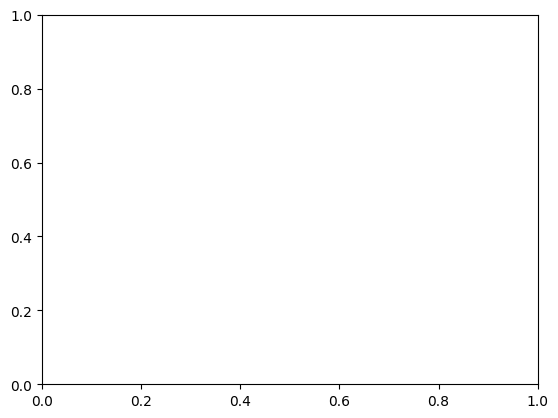

In [66]:
# do analysis for multi plot
thresholds = []
thresholds2 = []
cols = data.columns

# correlation window
window = 350

# rolling sum window
w = 1

quant = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    
    corr_multi = covariance_multi(data, var1_index, var2_indices, window)
    print(corr_multi)
    thresholds.append(
        get_empirical_diff_threshold(stat=corr_multi, window=w, fn=roll_sum, axis=-1, quantile=quant,
                                     sensor_names=[var1_index]))
    
    thresholds2.append(get_threshold(stat=corr_multi, window=w, fn=roll_sum, axis=-1, quantile=1-quant))
    print("******************************************************************************")


In [ ]:
all_attack_indices = set()

for start, end in all_attack_times:
    attack_indices = df_test.index[(df_test['Time'] >= start * 1e6) & (df_test['Time'] <= end * 1e6)] - 1201
    all_attack_indices.add((attack_indices[0], attack_indices[-1]))
    
all_attack_indices

In [ ]:
y_true = np.zeros(len(data_test))
for start, end in all_attack_indices:
    y_true[slice(start, end)] = 1

In [ ]:
cov_list = []

w = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1

    cov_multi = covariance_multi(data_test, var1_index, var2_indices, window=350)
    cov_list.append(
        roll_sum(stat=cov_multi,window=w, axis=0)
    )
    
rsum_list = np.array(cov_list)


  

In [ ]:
thresholds

In [ ]:
things = []
for i in adj_list:
  things+=[i]

In [ ]:
for index, i in enumerate(rsum_list):
  if things[index] in attack_dict:
    print("***********************************************************************************************")
    print(f"Attacked Sensor: {attack_dict[things[index]][-1]}, Attack Type: {attack_dict[things[index]][2]}, Time Attacked: {attack_dict[things[index]][0]}s to {attack_dict[things[index]][1]}s")
    plt.title(f"{cols[things[index]-1]}: {things[index]}")
    plt.axhline(thresholds[index], color='red')
    plt.axhline(thresholds2[index], color='red')
    attack_indices = df_test.index[(df_test['Time'] >= attack_dict[things[index]][0] * 1e6) & (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201
    for start, end in all_attack_indices:
      if attack_indices[0] == start:
        set_zero = np.zeros(len(data_test))
        for indices, j in enumerate(i):
          if j > thresholds[index]:
            
            set_zero[indices]=1
        EDD = expectation_detection_delay(set_zero,start-350)
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
      else:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    plt.plot(i)
    plt.show()
    print(f"EDD = {EDD}")

In [ ]:
at_sensors = []
for index, i in enumerate(rsum_list):
    print("***********************************************************************************************")
    attack_in = []
    for indices, j in enumerate(i):
      if j > thresholds[index]:
        attack_in += [indices]
    if len(attack_in) > 1:
      start = (df_test['Time'][attack_in[0]+1201])/1e6
      end = (df_test['Time'][attack_in[-1]+1201])/1e6
      a_type = ""
      if cols[things[index]-1][1] == "C":
        a_type = "CT_ratio"
      elif cols[things[index]-1][1] == "V":
        a_type = "PT_ratio"
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, Attack Type: {a_type}, Time Attacked: {start}s to {end}s")
      at_sensors += [things[index]]
    else:
      print(f"Sensor: {things[index]} {cols[things[index]-1]}, No Attacks")


    plt.title(f"{cols[things[index]-1]}: {things[index]}")
    plt.axhline(thresholds[index], color='red')


    if things[index] in attack_dict:
      attack_indices = df_test.index[(df_test['Time'] >= attack_dict[things[index]][0] * 1e6) & (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201
      for start, end in all_attack_indices:
        if attack_indices[0] == start:
          set_zero = np.zeros(len(data_test))
          for indices, j in enumerate(i):
            if j > thresholds[index]:
              set_zero[indices]=1
          EDD = expectation_detection_delay(set_zero,start-351)
          plt.axvline(start, color='red')
          plt.axvline(end, color='red')
        else:
          plt.axvline(start, color='pink', alpha=0.75)
          plt.axvline(end, color='pink', alpha=0.75)
    plt.plot(i)
    plt.show()
    print(f"EDD = {EDD}")

In [ ]:
at_sensors

In [ ]:
neighbors = []
for i in attack_dict:
  neighbors += [i]
  if i not in [55,39]:
    for j in adj_list[i]:
      neighbors += [j]

In [ ]:
for i in at_sensors:
  if i in neighbors:
    print("Yes")
  else:
    print("Fail")
  

In [ ]:
neighbors

In [ ]:
attack_dict

In [ ]:
co = 0
for var1_index, var2_indices in adj_list.items():
    set_zero = np.zeros(len(data_test))
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    violation = []

    for index, i in enumerate(rsum_list[co]):
      if i > thresholds[co]:
        set_zero[index]=1

    plt.plot(set_zero, alpha = 0.5)
    plt.plot(y_true)
    plt.show()
    accuracy, precision, recall, f1= get_scores(y_true, set_zero)
    ARL = average_run_length(set_zero, y_true)

    print(f"{cols[var1_index]} :{var1_index} has accuracy = {accuracy}, precision = {precision}, recall = {recall}, ARL = {ARL} and f1 = {f1}")
    co +=1

In [ ]:
cov_list = []

w = 1

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1

    cov_multi = covariance_multi(data, var1_index, var2_indices, window=350)
    cov_list.append(
        roll_sum(stat=cov_multi,window=w, axis=0)
    )
    
arl_list = np.array(cov_list)

This one is testing ARL for event 3

In [ ]:
co = 0
for var1_index, var2_indices in adj_list.items():
    set_zero = np.zeros(len(data))
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    violation = []

    for index, i in enumerate(arl_list[co]):
      if i > thresholds[co]:
        set_zero[index]=1

    plt.plot(set_zero, alpha = 0.5)
    plt.plot(y_true)
    plt.show()
    accuracy, precision, recall, f1= get_scores(y_true, set_zero)
    ARL = average_run_length(set_zero, y_true)

    print(f"{cols[var1_index]} :{var1_index+1} has accuracy = {accuracy}, precision = {precision}, recall = {recall}, ARL = {ARL} and f1 = {f1}")
    co +=1